# NLP

## EDA & Cleaning

    imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

    read

In [2]:
dep_df = pd.read_csv("../data/r_depression_data/raw_depression_data.csv")
anx_df = pd.read_csv("../data/r_anxiety_data/raw_Anxiety_data.csv")

C:\Users\mjwjl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,19,68,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\mjwjl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,3,4,6,7,8,9,10,11,12,17,19,21,22,24,27,29,30,32,33,35,36,46,50,60,67,68,69,71,73,74,75,79,82,83,84,85,89,90,91,92,93,94,95,96,97,98,99,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The data structure of each subreddit changes with time. Data types change and entire columns are added or absent depending on when a post was made. e.g. dep_df["is_created_from_ads_ui"]

In [3]:
dep_df.shape, anx_df.shape

((242712, 72), (259778, 102))

    null search

In [4]:
dep_df["selftext"].isnull().sum(), anx_df["selftext"].isnull().sum()

(1721, 12677)

In [5]:
dep_df["title"].isnull().sum(), anx_df["title"].isnull().sum()

(0, 0)

In [6]:
dep_df["subreddit"].isnull().sum(), anx_df["subreddit"].isnull().sum()

(0, 0)

In [7]:
#msno.matrix(dep_df.iloc[:,0:20].sample(1000))
#msno.matrix(dep_df.iloc[:,20:40].sample(1000))
#msno.matrix(dep_df.iloc[:,40:60].sample(1000))
#msno.matrix(dep_df.iloc[:,60:].sample(1000))

There are a few bands in the nulls: columns that have identical information formatted differently, author attributes that are empty have empty subattributes.

In [8]:
#dep_df.iloc[:,20:40]
#anx_df.iloc[:,50:70]

Examing all columns and type of entries they contain. 10 features retained from r/depression and 11 from r/anxiety. r/anxiety has a a column for "link flair text" that labels the posts subject matter, e.g. advice, venting, work/school, et c.. This is retained for experimentation, but is unlikely to be incorporated as it is absent in r/depression.

In [9]:
dep_features = ["title", "selftext", "score", "upvote_ratio","num_comments",
                "over_18", "created_utc", "full_link", "id", "subreddit"]

In [10]:
anx_features = ["title", "selftext", "score", "link_flair_text", "upvote_ratio", "num_comments",
                "over_18", "created_utc", "full_link", "id", "subreddit"]

    drop missing
    [removed]: is a removed by user, [deleted]: the user deleted account, NaN: multiple causes, one possibility was the user was banned or post was removed by moderator

In [11]:
# Fails to select nulls
# dep_df["selftext"].dropna(inplace=True)
# anx_df["selftext"].dropna(inplace=True)

In [12]:
dep_df.drop(dep_df[dep_df["selftext"].isnull()].index, inplace=True)
anx_df.drop(anx_df[anx_df["selftext"].isnull()].index, inplace=True)

dep_df.drop(dep_df[dep_df["selftext"] == "[removed]"].index, inplace=True)
anx_df.drop(anx_df[anx_df["selftext"] == "[removed]"].index, inplace=True)

dep_df.drop(dep_df[dep_df["selftext"] == "[deleted]"].index, inplace=True)
anx_df.drop(anx_df[anx_df["selftext"] == "[deleted]"].index, inplace=True)

dep_df.drop(dep_df[dep_df["selftext"] == ""].index, inplace=True)
anx_df.drop(anx_df[anx_df["selftext"] == ""].index, inplace=True)

In [13]:
dep_df.shape, anx_df.shape

((199667, 72), (235555, 102))

In [14]:
dep_df["selftext"].isnull().sum(), anx_df["selftext"].isnull().sum()

(0, 0)

    drop other criteria
    word_count, char_count

In [15]:
# dep_df[dep_df["selftext"].str.len() > 10]["selftext"].str.len().mean(),\
# anx_df[anx_df["selftext"].str.len() > 10]["selftext"].str.len().mean()

In [16]:
# dep_df[dep_df["selftext"].str.split().str.len() > 3]["selftext"].str.split().str.len().mean(),\
# anx_df[anx_df["selftext"].str.split().str.len() > 3]["selftext"].str.split().str.len().mean()

These criteria were explored here, but moved to early stage preprocessing.

    Visualization: Seasonality

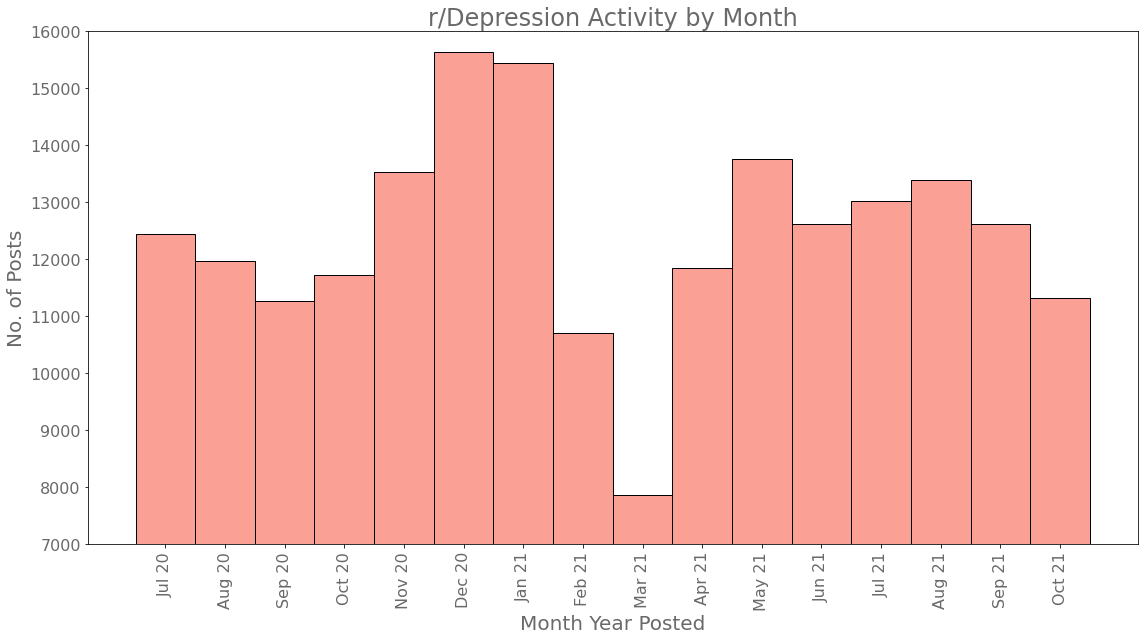

In [17]:
plt.figure(figsize=(16,9))
sns.histplot(pd.to_datetime(dep_df[dep_df["created_utc"] > 1593600000]["created_utc"][::-1], unit="s").dt.strftime("%b %y"), color="salmon")
plt.ylim(7000, 16000)
plt.title("r/Depression Activity by Month", fontsize=24, color="dimgrey")
plt.ylabel("No. of Posts", fontsize=20, color="dimgrey")
plt.xlabel("Month Year Posted", color="dimgrey", fontsize=20)
plt.yticks(fontsize=16, color="dimgrey")
plt.xticks(rotation = 90, fontsize=16, color="dimgrey")
plt.tight_layout()
plt.savefig("../images/r_depression_mo.png", transparent=True);

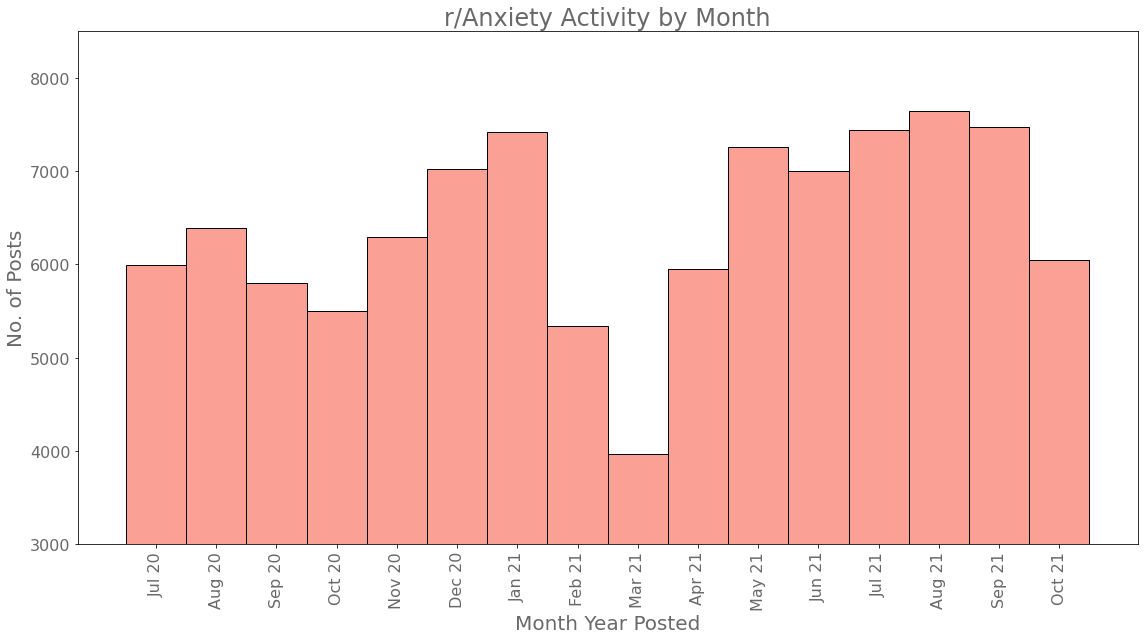

In [18]:
plt.figure(figsize=(16,9))
sns.histplot(pd.to_datetime(anx_df[anx_df["created_utc"] > 1593600000]["created_utc"][::-1], unit="s").dt.strftime("%b %y"), color="salmon")
plt.ylim(3000, 8500)
plt.title("r/Anxiety Activity by Month", fontsize=24, color="dimgrey")
plt.ylabel("No. of Posts", fontsize=20, color="dimgrey")
plt.xlabel("Month Year Posted", color="dimgrey", fontsize=20)
plt.yticks(fontsize=16, color="dimgrey")
plt.xticks(rotation = 90, fontsize=16, color="dimgrey");
plt.tight_layout()
plt.savefig("../images/r_anxiety_mo.png", transparent=True);

There is some weak evidence of seasonality. More historical data is needed to see if post count increase during certian mos./seasons. The 50% dip in March is notable. The conflating factors during the past two years make this difficult to interpret. Notably, this time period overlaps with a pandemic and an election/inauguration cycle.

    Feature Selection

In [19]:
dep_df.reset_index(inplace=True, drop=True);
anx_df.reset_index(inplace=True, drop=True);

In [20]:
dep_features_final = ["title", "selftext", "over_18", "created_utc", "subreddit"]
anx_features_final = ["title", "selftext", "over_18", "created_utc", "subreddit"]

In [21]:
dep_select = dep_df[dep_features_final];
anx_select = anx_df[anx_features_final];

It is not clear at this stage whether the problem statement can be answered. We are looking for latent features and will have to get to the modelling stage before we can assess a direction.

    export

In [22]:
dep_select.to_csv("../data/r_depression_data/cleaned_depression_data.csv", index=False)
anx_select.to_csv("../data/r_anxiety_data/cleaned_anxiety_data.csv", index=False)